In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
Data = pd.read_csv('C:\\Users\\Mkarry\\titanic-passengers.csv',sep=';')

In [3]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
Data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data.shape

(891, 12)

In [6]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Data.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
half_count = len(Data) / 2

Df=Data.dropna(axis=1,how='all', inplace=False, thresh=half_count)

In [9]:
Df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,S


In [10]:
Df.isnull().sum()/891*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [11]:
Df['Age'].fillna(Df['Age'].mean(),inplace=True)

C:\Users\Mkarry\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [12]:
#Df['Embarked'].fillna(Df['Embarked'].mode(),inplace=True)

In [13]:
Df.dropna(subset=['Embarked'], axis=0, inplace=True)

<ipython-input-13-33b732e5d389>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.dropna(subset=['Embarked'], axis=0, inplace=True)


In [14]:
Df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

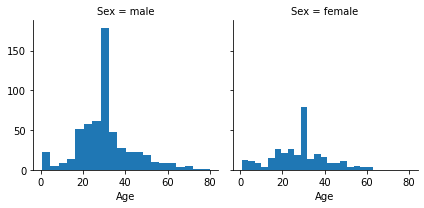

In [15]:
g=sns.FacetGrid(Df,col='Sex')
g.map(plt.hist,'Age',bins=20)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

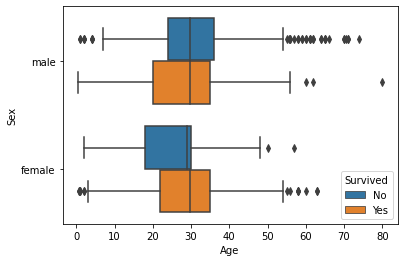

In [16]:
import seaborn as sns 
sns.boxplot(data=Df, x='Age', y='Sex',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Embarked'>

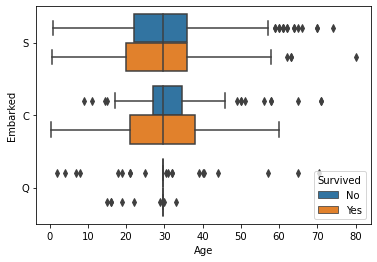

In [17]:
import seaborn as sns 
sns.boxplot(data=Df, x='Age', y='Embarked',hue='Survived')

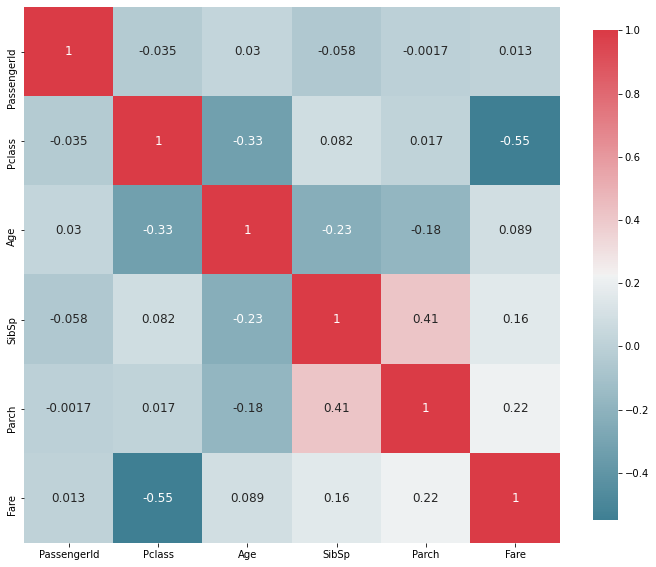

In [18]:
def plot_correlation_map( Df ):

    corr = Df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( Df )

In [19]:
Df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [21]:
Df['Survived'] = labelencoder.fit_transform(Df['Survived'])
Df['Survived']

<ipython-input-21-fea4e418887b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Survived'] = labelencoder.fit_transform(Df['Survived'])


0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 889, dtype: int32

In [22]:

Df[["Survived", "Pclass"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [23]:
columns_to_delete = ['Name']
Df.drop(columns_to_delete, inplace=True, axis=1)

C:\Users\Mkarry\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
#Df.drop(columns=['Name'])

In [25]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master",

                    }

In [29]:
Df1=Data.Name.str.split(",",expand=True)
Df1
Df2=Df1[1].str.split(".",expand=True)
Df2
Df['Title']=Df2[0]
Df

<ipython-input-29-a09d4447ab50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Title']=Df2[0]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,male,28.000000,0,0,248740,13.0000,S,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,S,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,S,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,C,Mr
888,535,0,3,female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,S,Mr


In [27]:
Df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [30]:
dummy=pd.get_dummies(Df['Sex'])
dummy.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [31]:
Df=pd.concat([Df, dummy], axis =1)
Df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,female,male
0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mr,0,1
1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mr,0,1
2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mr,0,1
3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs,1,0
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr,0,1


In [32]:
Df.drop('Sex',axis='columns', inplace=True)

In [33]:
dummy=pd.get_dummies(Df['Embarked'])
dummy.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
Df=pd.concat([Df, dummy], axis =1)
Df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,female,male,C,Q,S
0,343,0,2,28.0,0,0,248740,13.0000,S,Mr,0,1,0,0,1
1,76,0,3,25.0,0,0,348123,7.6500,S,Mr,0,1,0,0,1
2,641,0,3,20.0,0,0,350050,7.8542,S,Mr,0,1,0,0,1
3,568,0,3,29.0,0,4,349909,21.0750,S,Mrs,1,0,0,0,1
4,672,0,1,31.0,1,0,F.C. 12750,52.0000,S,Mr,0,1,0,0,1


In [35]:
Df.drop('Embarked',axis='columns', inplace=True)
Df.drop('Title',axis='columns', inplace=True)

In [36]:
Df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = Df[['Age', 'SibSp', 'Parch', 
       'Fare', 'female', 'male', 'C', 'Q', 'S']]
y = Df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.82


C:\Users\Mkarry\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

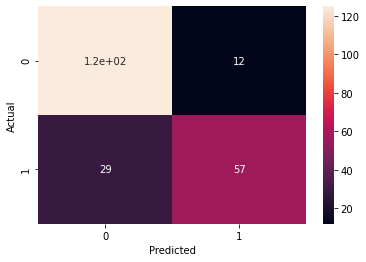

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [45]:
Df = Df[[ col for col in Df.columns if col != 'Survived' ] + ['Survived']]
Df

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S,Survived
0,343,2,28.000000,0,0,248740,13.0000,0,1,0,0,1,0
1,76,3,25.000000,0,0,348123,7.6500,0,1,0,0,1,0
2,641,3,20.000000,0,0,350050,7.8542,0,1,0,0,1,0
3,568,3,29.000000,0,4,349909,21.0750,1,0,0,0,1,0
4,672,1,31.000000,1,0,F.C. 12750,52.0000,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,2,14.000000,1,0,237736,30.0708,1,0,1,0,0,1
887,61,3,22.000000,0,0,2669,7.2292,0,1,1,0,0,0
888,535,3,30.000000,0,0,315084,8.6625,1,0,0,0,1,0
889,102,3,29.699118,0,0,349215,7.8958,0,1,0,0,1,0


In [46]:
x = Df.iloc[:,0:-1].values
y= Df.iloc[:,-1].values

In [48]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import roc_curve,roc_auc_score,auc 

In [49]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [50]:
logistic_fpr,logistic_tpr,threshold = roc_curve(y_test,y_pred)
auc_logistic = auc(logistic_fpr,logistic_tpr)

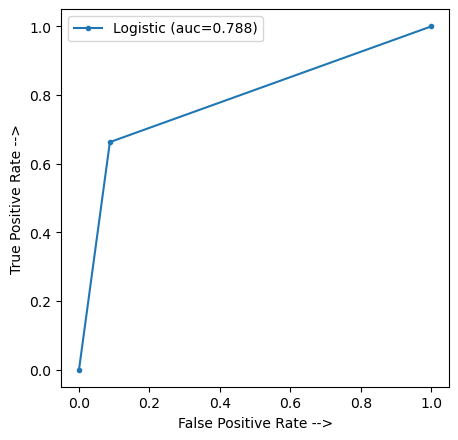

In [51]:

plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr, marker='.',label="Logistic (auc=%0.3f)" %auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()